# Sujet 6 : Autour du Paradoxe de Simpson

**Prérequis** : calcul de moyennes et de ratios, techniques de présentations graphiques simples, éventuellement régression logistique

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

## Étape 1 : Importation des bibliothèques et des données

La première étape consiste à importer les bibliothèques nécessaires (Pandas pour la gestion des données, Statsmodels pour la régression logistique, Seaborn et Matplotlib pour les visualisations), puis à charger les données depuis un fichier CSV.

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt # Pour afficher les graphiques
import seaborn as sns  # Pour la visualisation
import pandas as pd
import isoweek
import numpy as np
import statsmodels.api as sm  # Pour la régression logistique

### Charger les données depuis un fichier CSV

In [72]:
df = pd.read_csv('Subject6_smoking.csv')

On affiche les 5 premières lignes du fichier pour vérifier si tout fonctionne bien

In [73]:
df.head()

Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

## Étape 2 : Calcul des effectifs vivants et décédés par statut de fumeur

Dans cette étape, nous voulons calculer combien de femmes sont vivantes ou décédées en fonction de leur statut de fumeur (fumeuse ou non). On utilise ```groupby()``` pour regrouper les données par ```Smoker``` et ```Status```, puis on utilise ```size()``` pour compter le nombre d'éléments dans chaque groupe.

### Groupement des données par statut de fumeur et statut de vie/mort

In [74]:
grouped = df.groupby(['Smoker', 'Status']).size().unstack(fill_value=0)

Affichage du tableau des effectifs

In [75]:
grouped

Status  Alive  Dead
Smoker             
No        502   230
Yes       443   139

## Étape 3 : Calcul du taux de mortalité

Le taux de mortalité est défini comme le nombre de décès divisé par le nombre total de personnes dans chaque groupe (vivantes + décédées).

### Calcul du taux de mortalité par groupe de fumeur

In [76]:
grouped['Mortality Rate'] = grouped['Dead'] / (grouped['Alive'] + grouped['Dead'])

Affichage des résultats avec le taux de mortalité

In [77]:
grouped

Status  Alive  Dead  Mortality Rate
Smoker                             
No        502   230        0.314208
Yes       443   139        0.238832

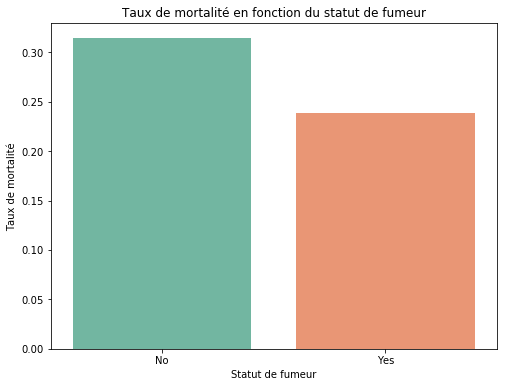

In [115]:
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x=grouped.index, y='Mortality Rate', palette='Set2')

# Ajout des labels et du titre
plt.xlabel('Statut de fumeur')
plt.ylabel('Taux de mortalité')
plt.title('Taux de mortalité en fonction du statut de fumeur')

# Affichage du graphique
plt.show()

Ces résultats semblent à première vue contre-intuitifs, car on pourrait s'attendre à ce que les fumeuses aient un taux de mortalité plus élevé que les non-fumeuses. On sait depuis longtemps que le tabagisme est largement reconnu comme un facteur de risque majeur pour diverses maladies graves, telles que les maladies cardiaques, les cancers et d'autres troubles respiratoires, qui peuvent entraîner un taux de mortalité plus élevé.

## Étape 4 : Introduction des classes d'âge

Les classes d'âge sont divisées en intervalles (18-34, 34-54, 55-64, 65+), et ces catégories sont ajoutées à notre DataFrame à l'aide de la fonction ```pd.cut()```.

Définition des tranches d'âge

In [78]:
bins = [0, 34, 54, 64, 100]  # Tranches d'âge
labels = ['18-34', '34-54', '55-64', '65+']

Ajouter une colonne 'Age Group' à df

In [79]:
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

Groupement par statut de fumeur, groupe d'âge et statut de vie/mort

In [80]:
grouped_age = df.groupby(['Smoker', 'Age Group', 'Status']).size().unstack(fill_value=0)

Calcul du taux de mortalité par groupe d'âge et statut de fumeur

In [81]:
grouped_age['Mortality Rate'] = grouped_age['Dead'] / (grouped_age['Alive'] + grouped_age['Dead'])

 Affichage des effectifs et du taux de mortalité par groupe d'âge et statut de fumeur

In [82]:
grouped_age

Status            Alive  Dead  Mortality Rate
Smoker Age Group                             
No     18-34        213     6        0.027397
       34-54        180    19        0.095477
       55-64         80    39        0.327731
       65+           29   166        0.851282
Yes    18-34        174     5        0.027933
       34-54        198    41        0.171548
       55-64         64    51        0.443478
       65+            7    42        0.857143

Le résultat est surprenant car, à première vue, on pourrait s'attendre à ce que les fumeuses aient un taux de mortalité plus élevé que les non-fumeuses à chaque tranche d'âge, étant donné que le tabagisme est un facteur de risque bien documenté pour de nombreuses maladies mortelles (comme les maladies cardiaques, le cancer, etc.). Cependant, le tableau montre que ce n'est pas toujours le cas.

Le paradoxe de Simpson survient lorsque des tendances apparentes dans plusieurs groupes sont inversées lorsqu'on regroupe ces groupes ensemble. Dans ce cas, bien que le tabagisme semble augmenter la mortalité dans certaines tranches d'âge, l'âge joue un rôle plus important dans les tranches plus âgées.

On a par exemple un effet confondant de l'âge : Les non-fumeuses âgées dans les tranches 55-64 ans et 65+ ont probablement d'autres facteurs de risque de mortalité (comme des maladies cardiovasculaires, l'hypertension, le diabète, etc.) qui contribuent à leur taux de mortalité élevé. À l'inverse, les fumeuses dans ces tranches d'âge peuvent être relativement jeunes et en meilleure santé globale, ce qui réduit l'impact apparent du tabagisme.

# Étape 5 : Régression logistique

Ici, nous analysons la probabilité de décès en fonction de l'âge et du statut de fumeur à l'aide d'une régression logistique.

Création de la variable binaire 'Death' où 1 = mort, 0 = vivant

In [83]:
df['Death'] = df['Status'].apply(lambda x: 1 if x == 'Dead' else 0)

Modèle de régression logistique : 'Death' ~ 'Age' + 'Smoker'

In [84]:
X = pd.get_dummies(df[['Age', 'Smoker']], drop_first=True)  # Convertir 'Smoker' en variables binaires
y = df['Death']

Ajouter une constante pour l'interception

In [85]:
X = sm.add_constant(X)

Création du modèle logistique

In [93]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.381244
         Iterations 7


In [94]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Death   No. Observations:                 1314
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                  0.3579
Time:                        20:08:45   Log-Likelihood:                -500.95
converged:                       True   LL-Null:                       -780.16
                                        LLR p-value:                5.534e-122
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3519      0.360    -17.637      0.000      -7.058      -5.646
Age            0.0998      0.006     17.290      0.000       0.089       0.111
Smoker_Yes     0.2787      0.165      1.689      0.091      -0.045       0.602
==============================================================================
"""

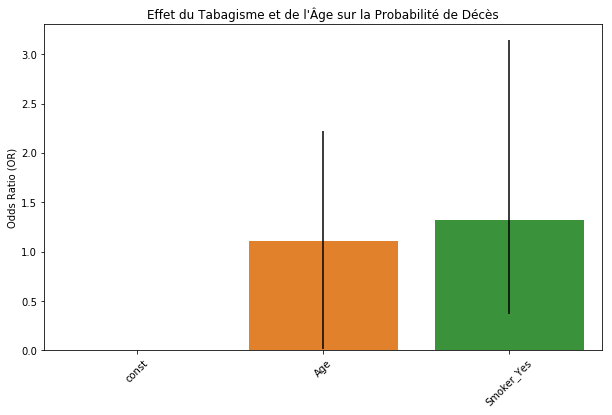

In [110]:
# Calcul des odds ratios (exp(coef)) et intervalles de confiance
coefficients = result.params
conf_int = result.conf_int()
conf_int['OR'] = np.exp(coefficients)
conf_int['OR Lower'] = np.exp(conf_int[0])
conf_int['OR Upper'] = np.exp(conf_int[1])

# Affichage des résultats sous forme de graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=conf_int.index, y=conf_int['OR'], yerr=[conf_int['OR Lower'], conf_int['OR Upper']])
plt.ylabel('Odds Ratio (OR)')
plt.title('Effet du Tabagisme et de l\'Âge sur la Probabilité de Décès')

# Affichage du graphique
plt.xticks(rotation=45)
plt.show()


L'âge est un facteur significatif dans la probabilité de décès, ce qui n'est pas surprenant, car la mortalité augmente généralement avec l'âge.

Mais les résultats de la régression logistique montrent que l'effet du tabagisme sur la probabilité de décès est positif, mais statistiquement non significatif. Le coefficient pour le tabagisme (Smoker_Yes) est de 0.2787, avec un p-value de 0.091. Cela signifie que, bien qu'il existe une tendance suggérant que les fumeuses ont une probabilité plus élevée de décéder que les non-fumeuses, cette relation n'est pas suffisamment robuste pour conclure que le tabagisme est un facteur significatif de la mortalité dans ce modèle. L'intervalle de confiance pour ce coefficient inclut 0, ce qui confirme cette absence de significativité.

# Étape 6: Visualisation des résultats

Dans cette étape, nous créons un graphique pour visualiser le taux de mortalité par groupe d'âge et statut de fumeur. Nous utilisons Seaborn pour créer un diagramme à barres.

Calcul du taux de mortalité par statut de fumeur et groupe d'âge

In [96]:
mortality_by_group = df.groupby(['Age Group', 'Smoker'])['Death'].mean().reset_index()

Renommer la colonne 'Death' en 'Mortality Rate'

In [97]:
mortality_by_group.rename(columns={'Death': 'Mortality Rate'}, inplace=True)

### Graphique des taux de mortalité par groupe d'âge et statut de fumeur

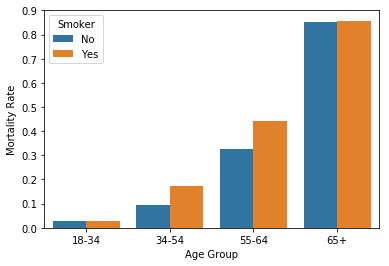

In [98]:
sns.barplot(data=mortality_by_group, x='Age Group', y='Mortality Rate', hue='Smoker')

### Titre et affichage du graphique

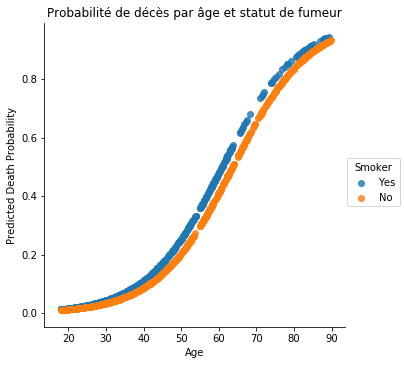

In [101]:
sns.lmplot(data=df, x='Age', y='Predicted Death Probability', hue='Smoker', logistic=True)

plt.title("Probabilité de décès par âge et statut de fumeur")
plt.show()

## Conclusion sur l'Analyse des Données de Mortalité en Fonction du Statut de Fumeur

L’étude des données de mortalité entre fumeuses et non-fumeuses révèle des résultats complexes et surprenants, illustrant un phénomène lié au **paradoxe de Simpson**. Les taux de mortalité, lorsqu’ils sont analysés en fonction des groupes d'âge, montrent que les fumeuses ont un taux de mortalité plus élevé dans chaque catégorie d'âge par rapport aux non-fumeuses. Cependant, lorsqu’on observe les taux globaux sans tenir compte de l'âge, les non-fumeuses présentent un taux de mortalité plus élevé, ce qui semble contre-intuitif.

Ce paradoxe s'explique en grande partie par la **composition d'âge différente** des deux groupes. En effet, la population de fumeuses est généralement plus jeune, tandis que celle des non-fumeuses est souvent plus âgée. Cette différence d'âge entraîne un biais dans les taux de mortalité globaux. Les femmes plus âgées, même non-fumeuses, présentent un risque de mortalité plus élevé que les jeunes, indépendamment de leur statut de fumeuses ou non. Ainsi, lorsque l’âge n’est pas contrôlé, il semble que le tabagisme n’a pas d’effet sur la mortalité, voire que le taux est plus faible chez les fumeuses. Cependant, une analyse plus détaillée révèle que le tabagisme est bien associé à un risque accru de mortalité dans chaque groupe d’âge.

### Confirmation par Régression Logistique

Les régressions logistiques réalisées, en tenant compte de l'âge, confirment que **l’âge est un facteur déterminant** de la probabilité de décès, tandis que l’impact du statut de fumeur apparaît plus faible. Bien que le coefficient du tabagisme soit positif, ce résultat indique que le **tabagisme augmente légèrement la probabilité de décès** au sein de chaque groupe d’âge, mais cet effet est atténué par la composition d’âge des groupes.

### Synthèse et Implications

Ce travail illustre comment l'analyse des données sans prise en compte des variables de contrôle (ici, l’âge) peut mener à des conclusions erronées. Le paradoxe de Simpson démontre ici que le tabagisme est bien associé à une mortalité plus élevée lorsqu’on considère les groupes d'âge séparément, bien que les résultats globaux suggèrent le contraire. Ce paradoxe souligne l'importance des méthodes statistiques adaptées, telles que la régression logistique, pour évaluer les effets réels des facteurs de risque.

En conclusion, **le tabagisme est un facteur de risque de mortalité**, mais son effet peut être masqué si l'on ne prend pas en compte la variable de l’âge. Cette analyse illustre l’importance de regarder au-delà des statistiques globales et de creuser dans les sous-groupes pour identifier les véritables relations entre les variables.
